Sample--> y_true = (0.75 * x_data) + 5 + noise

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
x_data = np.linspace(0.0,10.0,1000000)

In [16]:
noise = np.random.randn(len(x_data))

In [17]:
y_true = (0.75 * x_data) + 5 + noise

In [18]:
my_data = pd.concat([pd.DataFrame(data=x_data,columns=['X Data']),pd.DataFrame(data=y_true,columns=['Y'])],axis=1)

<AxesSubplot:xlabel='X Data', ylabel='Y'>

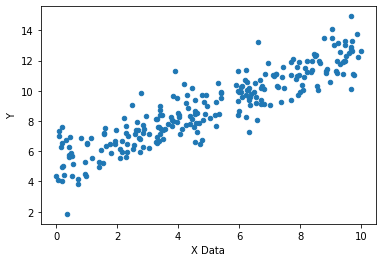

In [19]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y = 'Y')

In [25]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [26]:
m = tf.Variable(tf.ones([1],tf.float32))
b = tf.Variable(tf.ones([1],tf.float32))

In [27]:
xph = tf.placeholder(tf.float32,[10])
yph = tf.placeholder(tf.float32,[10])

In [28]:
y = m * xph + b

In [29]:
error = tf.reduce_sum(tf.square(y-yph))

In [30]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [31]:
init = tf.global_variables_initializer()

In [34]:
with tf.Session() as sess:
    
    sess.run(init)
    
    epoch = 1000
    
    for i in range(epoch):
        rand_ind = np.random.randint(len(x_data),size=10)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
        
    model_m,model_b = sess.run([m,b])
        
    

In [36]:
model_m

array([0.7491783], dtype=float32)

In [37]:
model_b

array([4.950332], dtype=float32)